# Valuation of IVU Traffic Solutions AG

This notebook attempts a layman valuation of the German company "IVU Traffic Solutions AG".

In [19]:
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 18, 'figure.facecolor': '1', 'figure.figsize': (10, 4)})

First, let's load some of the data from the company's quarterly reports. Because parsing PDFs is annoying, I already converted it into a CSV file:

In [22]:
df = pd.read_csv('IVU/IVU_Reports_Data.csv')
del df['Company']
df = df.set_index(["Year", "Quarter"])
df

Revenue  GrossProfit  StaffExpenditures  EBIT  NetProfit
Year Quarter                                                          
2018 Q3         51932        35317              24772  3149       2731
     Q2         29965        20673              16771  -625       -911
     Q1         13993         9695               8261  -684       -837
2017 Q4         71100        47700              31200  6100       5000
     Q3         40756        29303              22362    65       -493
     Q2         26153        19239              15064  -592      -1085
     Q1         11572         8945               7380  -679       -920
2016 Q4         59800        42800              28600  1400       -200
     Q3         37292        27398              20613 -1902      -2854
     Q2         22771        17494              14517 -1586      -2244
     Q1          9761         7387               7134 -1812      -2419
2015 Q4         58100        40100              25200  4900       3600
     Q3         33453        24173              18130   -66       -721
     Q2         21458        15674              12720  -914      -1186
     Q1          9361         7335               6316  -786       -855
2014 Q4         47200        37100              23900  4300       4400

Now, to get a feel for this dataset, let's plot it:

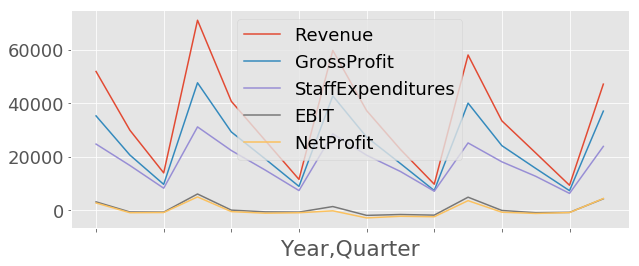

In [23]:
df.plot();

Why the wild cyclical swings? This is because in IVU's reports, data points like revenue are reported for the YTD each Quarter. So Q2 will contain values for Jan to Jul.

As the next part of our data processing, we will try to get the actual offsets for each quarter:

In [43]:
# WIP
df.loc[pd.IndexSlice[:,['Q3']], :]

,,Revenue,GrossProfit,StaffExpenditures,EBIT,NetProfit
Year,Quarter,,,,,
2018,Q3,51932,35317,24772,3149,2731
2017,Q3,40756,29303,22362,65,-493
2016,Q3,37292,27398,20613,-1902,-2854
2015,Q3,33453,24173,18130,-66,-721
